$$ Уравнение \: теплопроводности $$ 

$$\frac{\partial u}{\partial t} \: = \: a\frac{\partial^2 u}{\partial^2 x} \: +  \: f(x,\,t)\,, \: 0 < x < 1, \: 0 < t \le 1,$$

$$  \quad u(x,\,0) \: = \: \mu(x), \: x \, \in \, [0, \, 1],$$ 

$$ u(0,\,t) \: = \: \mu_1(t), \quad u(1,\,t) \: = \: \mu_2(t) \,, \: t \, \in  \, [0, \, 1] ; $$

$$Схема \: Кранка-Николсона $$

$$ \frac{u^{j+1}_k \: - \: u^j_k}{\tau} \: = \: a\Biggl(\frac{u^{j+1}_{k+1} \: - \: 2u^{j+1}_{k} \: + \: u^{j+1}_{k-1}}{2h^2} + \: \frac{u^{j}_{k+1} \: - \: 2u^{j}_{k} \: + \: u^{j}_{k-1}}{2h^2} \Biggr) \: + \: f^{j+1}_k \: \cdot
 $$
 
 $$  При \: a \: = 0.017 \;\: точное \: решение:
 \quad u(x,t) \: = \: -x^4 \: + \: tx \: + t^2 \: - te^x \: \cdot $$


In [11]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d
from matplotlib.colors import LinearSegmentedColormap
from matplotlib import cm

In [12]:
def mygreed(Nx, Nt, x_0=0, x_N=1, t_0=0, t_N=1):
    return np.linspace(x_0,x_N,Nx), np.linspace(t_0,t_N,Nt)

def solve_trid_matrix(a, b, c, d, N):
    _c = np.zeros(N)
    _d = np.zeros(N)
    x = np.zeros(N)
    _c[0] = 0
    _d[0] = d[0]
    for i in range(1,N):
        _c[i] = c/(b - a*_c[i-1])
        _d[i] = (d[i] - a*_d[i-1])/(b - a*_c[i-1])
    x[N-1] = d[N-1]
    for i in range(2,N):
        x[N-i] = _d[N-i] - _c[N-i]*x[N-i+1]
    return x[1:-1]
    
def plot_3d_color(xm,tm,um,title = '',x_lable = 'x',y_lable = 't',z_lable = 'Z'):
    ax = axes3d.Axes3D(plt.figure())
    ax.set_xlabel(x_lable)
    ax.set_ylabel(y_lable)
    ax.set_zlabel(z_lable)
    ax.plot_surface(xm, tm , um, rstride=5, cstride=5,cmap = cm.jet )
    plt.show()    

In [13]:
def cr_nich(dx, dt, f, m, m_1, m_2, a):
    Nx, Nt = int(1/dx), int(1/dt)
    x, t = mygreed(Nx, Nt) 
    U, B = np.zeros(shape = (Nt,Nx)), np.zeros(Nx)
    U[0,:], U[:,0], U[:,-1]  = m(x[:]), m_1(t[:]), m_2(t[:])  # Начальные условия
    q = dt*a/(dx**2)

    for j in range(0,Nt-1):
        B[0], B[-1] = U[j,0], U[j,-1]
        B[1:-1] = q*( U[j,0:Nx-2] + U[j,2:Nx] ) + (2-2*q)*U[j,1:Nx-1] + 2*dt*f(x[1:Nx-1],t[j+1])
        U[j+1,1:-1] = solve_trid_matrix(-q,2+2*q,-q,B,Nx)
    return U

In [14]:
a=0.017
u = lambda x,t: -x**4 + t*x + t**2 - t*np.e**x
f = lambda x,t: x + 2*t +  (a*t - 1)*np.e**x + 12*a*x**2
m_1 = lambda t: t**2 - t
m_2 = lambda t: -1 + t + t**2 - t*np.e
m = lambda x: -x**4 

dx = 1e-2
dt = 1e-2
Nx, Nt = int(1/dx), int(1/dt)
U = cr_nich(dx, dt, f, m, m_1, m_2, a)
x,t = mygreed(Nx,Nt)
xm, tm = np.meshgrid(x, t)
er=abs(U - u(xm,tm))


Максимальная погрешность: 0.01102220653
Теоретический порядок погрешности O(dx^2 + dt): 0.0101


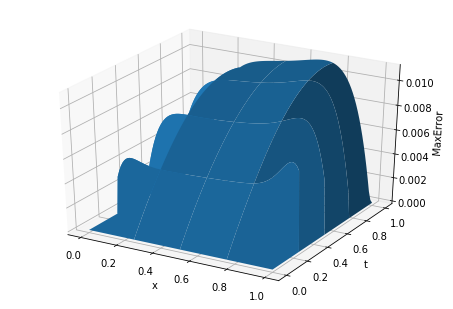

In [15]:
print("Максимальная погрешность:",er.max())
print("Теоретический порядок погрешности O(dx^2 + dt):", dx**2 + dt)
plot_3d_color(xm,tm,er,z_lable = 'MaxError')

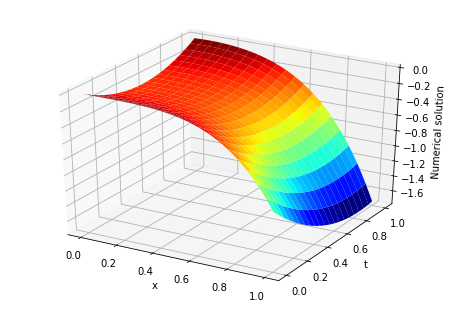

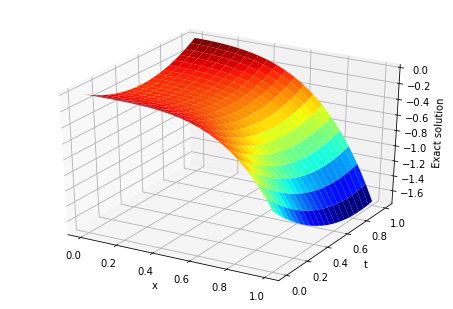

In [16]:
plot_3d_color(xm,tm,U,z_lable = 'Numerical solution')
plot_3d_color(xm,tm,u(xm,tm),z_lable = 'Exact solution')